<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Code to apply a function to a dataframe selected cols, 

In [3]:

from pandas import read_hdf
df_final_train = read_hdf('../content/drive/MyDrive/kaggle_folder/FaceBook Friend Recommendation/data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('../content/drive/MyDrive/kaggle_folder/FaceBook Friend Recommendation/data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')


Debugging Code -have to remove

In [9]:
df = pd.DataFrame([[1,2,3]]*3,columns=['A', 'B', 'C'])
df

df['D']= df['A']*df['B']
df

,A,B,C,D
0,1,2,3,2
1,1,2,3,2
2,1,2,3,2


Adding preferential attahment to the set of features

In [4]:
# For Followers
df_final_train["preferential_attachment"] = df_final_train["num_followers_s"]*df_final_train['num_followers_d']

df_final_test["preferential_attachment"] = df_final_test["num_followers_s"]*df_final_test['num_followers_d']


In [5]:
# For Followees
df_final_train["preferential_attachment_followees"] = df_final_train["num_followees_s"]*df_final_train['num_followees_d']

df_final_test["preferential_attachment_followees"] = df_final_test["num_followees_s"]*df_final_test['num_followees_d']


In [7]:
df_final_train.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment,preferential_attachment_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666237e-13,4.613664e-13,1.043042e-05,6.677505e-13,2.451089e-13,3.584763e-12,-2.038017e-11,5.397748e-13,1.068942e-06,1.192410e-12,2.279486e-12,3.581020e-12,-7.215191e-13,3.926056e-13,1.983698e-06,1.545063e-13,8.108121e-13,1.719696e-14,-1.355366e-12,4.675341e-13,1.128587e-06,6.616625e-14,9.771074e-13,4.159880e-14,66,120
1,1801683,1245657,1,0,0.100000,0.000000,0.235702,7,2,9,2,0,1,1.183295,1,1,7,0.577350,0.316228,0.893578,0.182574,1.470928,1.209806,7.238257e-07,2.782689e-07,0.000758,0.000739,1.013855e-16,5.105642e-18,3.304920e-17,2.315182e-18,-5.054387e-14,5.704760e-14,1.674895e-08,4.634614e-14,4.250708e-14,1.870664e-15,-3.565761e-16,2.439528e-15,1.468632e-09,2.631892e-16,3.057566e-15,9.410518e-17,-2.035780e-14,2.338664e-13,1.356155e-07,1.407410e-14,1.690167e-13,6.160004e-16,-3.447213e-16,6.982336e-14,5.574023e-08,1.027071e-15,2.367022e-15,4.315478e-17,14,18
2,1430596,400599,1,0,0.098039,0.051948,0.233126,49,11,46,10,4,5,4.452493,1,1,2,0.288675,0.145865,0.434540,0.042108,0.723215,0.580405,5.976691e-06,7.277833e-07,0.000920,0.000774,1.246679e-15,1.285958e-17,3.847455e-16,9.914485e-18,-1.545998e-13,3.406189e-12,2.640249e-10,2.506346e-11,1.452783e-13,2.299905e-14,-1.001794e-11,1.448895e-13,1.966978e-12,6.261642e-12,2.993130e-12,2.371777e-16,-2.406293e-12,1.303483e-11,9.021400e-11,6.494928e-10,8.942301e-11,7.171202e-15,-4.091513e-13,4.076777e-14,2.783357e-12,4.809180e-13,9.748511e-14,1.847902e-16,539,460
3,768675,338516,1,0,0.000000,0.000000,0.000000,0,9,1,8,0,0,0.000000,0,0,-1,0.333333,1.000000,1.333333,0.333333,1.666667,2.333333,1.655650e-07,1.080256e-06,0.000731,0.000768,6.584056e-17,1.661895e-15,0.000000e+00,9.173002e-15,-7.424279e-20,-1.036724e-19,-1.730221e-20,7.525020e-20,8.295765e-21,-1.100153e-19,-6.339317e-13,4.935772e-11,6.213172e-06,3.473172e-12,5.118870e-12,3.066056e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.978464e-12,1.375629e-11,1.501628e-06,2.386703e-12,5.780655e-12,1.709675e-13,0,8
4,5411,815927,1,0,0.090909,0.030376,0.173494,15,17,13,23,2,3,2.036029,0,1,2,0.235702,0.267261,0.502964,0.062994,0.738666,0.770225,1.581775e-06,1.562553e-06,0.000790,0.000798,3.358627e-16,9.399274e-14,1.458919e-15,1.479350e-15,-2.936392e-11,3.218061e-12,1.003391e-08,3.037910e-11,2.823142e-12,6.196259e-15,-3.062833e-11,2.085215e-12,8.424464e-10,1.209431e-11,2.931816e-12,1.734101e-12,-5.239897e-12,2.336958e-12,3.936108e-10,1.788199e-12,2.154215e-11,2.719227e-14,-3.836860e-12,3.861541e-12,3.377450e-10,2.467623e-12,2.228869e-11,2.757369e-14,255,299


Adding svd_dot feature


In [6]:
df_final_train['svd_dot_1'] = df_final_train['svd_u_s_1']*df_final_train['svd_u_d_1']+\
df_final_train['svd_u_s_2']*df_final_train['svd_u_d_2']+\
df_final_train['svd_u_s_3']*df_final_train['svd_u_d_3']+\
df_final_train['svd_u_s_4']*df_final_train['svd_u_d_4']+\
df_final_train['svd_u_s_5']*df_final_train['svd_u_d_5']+\
df_final_train['svd_u_s_6']*df_final_train['svd_u_d_6']

In [7]:
df_final_train['svd_dot_2'] = df_final_train['svd_v_s_1']*df_final_train['svd_v_d_1']+\
df_final_train['svd_v_s_2']*df_final_train['svd_v_d_2']+\
df_final_train['svd_v_s_3']*df_final_train['svd_v_d_3']+\
df_final_train['svd_v_s_4']*df_final_train['svd_v_d_4']+\
df_final_train['svd_v_s_5']*df_final_train['svd_v_d_5']+\
df_final_train['svd_v_s_6']*df_final_train['svd_v_d_6']

In [8]:
df_final_test['svd_dot_1'] = df_final_test['svd_u_s_1']*df_final_test['svd_u_d_1']+\
df_final_test['svd_u_s_2']*df_final_test['svd_u_d_2']+\
df_final_test['svd_u_s_3']*df_final_test['svd_u_d_3']+\
df_final_test['svd_u_s_4']*df_final_test['svd_u_d_4']+\
df_final_test['svd_u_s_5']*df_final_test['svd_u_d_5']+\
df_final_test['svd_u_s_6']*df_final_test['svd_u_d_6']

In [9]:
df_final_test['svd_dot_2'] = df_final_test['svd_v_s_1']*df_final_test['svd_v_d_1']+\
df_final_test['svd_v_s_2']*df_final_test['svd_v_d_2']+\
df_final_test['svd_v_s_3']*df_final_test['svd_v_d_3']+\
df_final_test['svd_v_s_4']*df_final_test['svd_v_d_4']+\
df_final_test['svd_v_s_5']*df_final_test['svd_v_d_5']+\
df_final_test['svd_v_s_6']*df_final_test['svd_v_d_6']

In [10]:
df_final_train.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment,preferential_attachment_followees,svd_dot_1,svd_dot_2
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,-1.666237e-13,4.613664e-13,1.043042e-05,6.677505e-13,2.451089e-13,3.584763e-12,-2.038017e-11,5.397748e-13,1.068942e-06,1.192410e-12,2.279486e-12,3.581020e-12,-7.215191e-13,3.926056e-13,1.983698e-06,1.545063e-13,8.108121e-13,1.719696e-14,-1.355366e-12,4.675341e-13,1.128587e-06,6.616625e-14,9.771074e-13,4.159880e-14,66,120,1.114952e-11,2.238775e-12
1,1801683,1245657,1,0,0.100000,0.000000,0.235702,7,2,9,2,0,1,1.183295,1,1,7,0.577350,0.316228,0.893578,0.182574,1.470928,1.209806,7.238257e-07,2.782689e-07,0.000758,0.000739,1.013855e-16,5.105642e-18,3.304920e-17,2.315182e-18,-5.054387e-14,5.704760e-14,1.674895e-08,4.634614e-14,4.250708e-14,1.870664e-15,-3.565761e-16,2.439528e-15,1.468632e-09,2.631892e-16,3.057566e-15,9.410518e-17,-2.035780e-14,2.338664e-13,1.356155e-07,1.407410e-14,1.690167e-13,6.160004e-16,-3.447213e-16,6.982336e-14,5.574023e-08,1.027071e-15,2.367022e-15,4.315478e-17,14,18,2.459805e-17,7.559238e-15
2,1430596,400599,1,0,0.098039,0.051948,0.233126,49,11,46,10,4,5,4.452493,1,1,2,0.288675,0.145865,0.434540,0.042108,0.723215,0.580405,5.976691e-06,7.277833e-07,0.000920,0.000774,1.246679e-15,1.285958e-17,3.847455e-16,9.914485e-18,-1.545998e-13,3.406189e-12,2.640249e-10,2.506346e-11,1.452783e-13,2.299905e-14,-1.001794e-11,1.448895e-13,1.966978e-12,6.261642e-12,2.993130e-12,2.371777e-16,-2.406293e-12,1.303483e-11,9.021400e-11,6.494928e-10,8.942301e-11,7.171202e-15,-4.091513e-13,4.076777e-14,2.783357e-12,4.809180e-13,9.748511e-14,1.847902e-16,539,460,6.787468e-22,5.736840e-22
3,768675,338516,1,0,0.000000,0.000000,0.000000,0,9,1,8,0,0,0.000000,0,0,-1,0.333333,1.000000,1.333333,0.333333,1.666667,2.333333,1.655650e-07,1.080256e-06,0.000731,0.000768,6.584056e-17,1.661895e-15,0.000000e+00,9.173002e-15,-7.424279e-20,-1.036724e-19,-1.730221e-20,7.525020e-20,8.295765e-21,-1.100153e-19,-6.339317e-13,4.935772e-11,6.213172e-06,3.473172e-12,5.118870e-12,3.066056e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.978464e-12,1.375629e-11,1.501628e-06,2.386703e-12,5.780655e-12,1.709675e-13,0,8,-1.075064e-25,0.000000e+00
4,5411,815927,1,0,0.090909,0.030376,0.173494,15,17,13,23,2,3,2.036029,0,1,2,0.235702,0.267261,0.502964,0.062994,0.738666,0.770225,1.581775e-06,1.562553e-06,0.000790,0.000798,3.358627e-16,9.399274e-14,1.458919e-15,1.479350e-15,-2.936392e-11,3.218061e-12,1.003391e-08,3.037910e-11,2.823142e-12,6.196259e-15,-3.062833e-11,2.085215e-12,8.424464e-10,1.209431e-11,2.931816e-12,1.734101e-12,-5.239897e-12,2.336958e-12,3.936108e-10,1.788199e-12,2.154215e-11,2.719227e-14,-3.836860e-12,3.861541e-12,3.377450e-10,2.467623e-12,2.228869e-11,2.757369e-14,255,299,8.454312e-18,1.334538e-19


In [26]:
print(b)

{0: 1, 1: 2, 2: 3}


In [11]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [12]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9179512783706755 test Score 0.909570650567822
Estimators =  50 Train Score 0.9223878727136057 test Score 0.9160654211539683
Estimators =  100 Train Score 0.9221029796731434 test Score 0.9157787924911214
Estimators =  250 Train Score 0.922537269804151 test Score 0.9163211777646162
Estimators =  450 Train Score 0.9225840785533167 test Score 0.9162949024251009


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

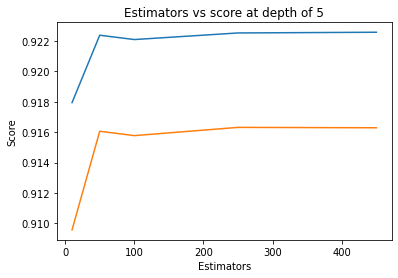

In [15]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.867613933577445 test Score 0.8489192910374369
depth =  9 Train Score 0.9592267888672293 test Score 0.9188658297036468
depth =  11 Train Score 0.9621718389226246 test Score 0.922393641888733
depth =  15 Train Score 0.964234940493115 test Score 0.9209971685862091
depth =  20 Train Score 0.9649662453682554 test Score 0.9081738230729436
depth =  35 Train Score 0.9649179795354881 test Score 0.9122761818884453
depth =  50 Train Score 0.9649179795354881 test Score 0.9122761818884453
depth =  70 Train Score 0.9649179795354881 test Score 0.9122761818884453
depth =  130 Train Score 0.9649179795354881 test Score 0.9122761818884453


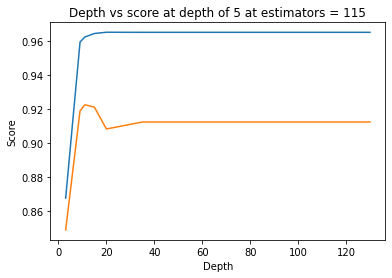

In [16]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 50')
plt.show()

In [19]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(45,55),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96385761 0.96454191 0.9615621  0.9628254  0.96464131]
mean train scores [0.96485617 0.96565482 0.96211852 0.96372255 0.96576187]


In [20]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=-1,
                       oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [21]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=-1,
                       oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [22]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [23]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9661898569570871
Test f1 score 0.9220042643923241


In [24]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


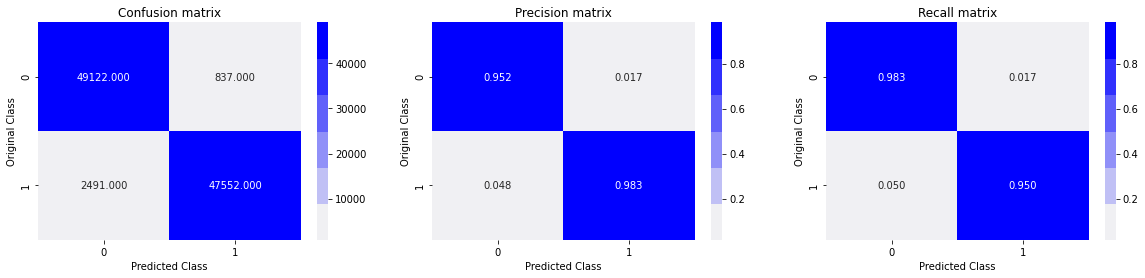

Test confusion_matrix


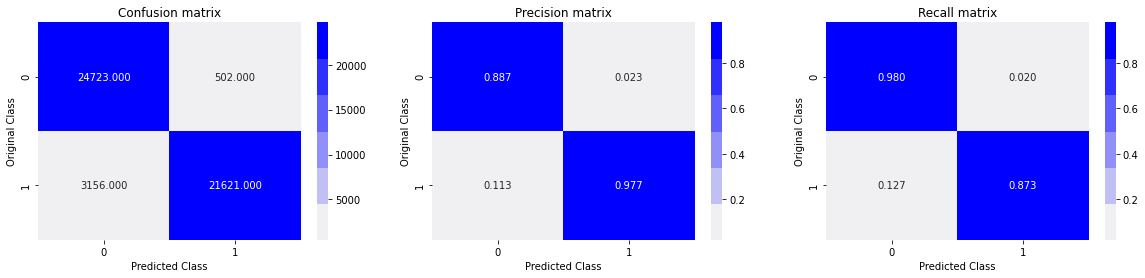

In [25]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

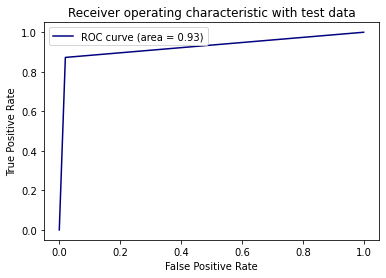

In [26]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

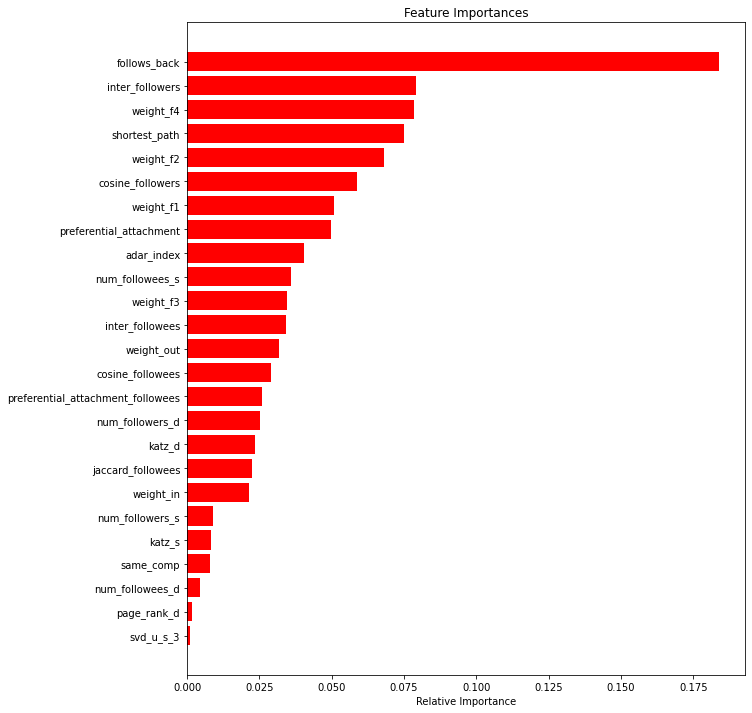

In [27]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [28]:
import xgboost as xgb
clf = xgb.XGBClassifier()
param_dist = {"n_estimators":sp_randint(45,80),
              "max_depth": sp_randint(10,15)
              }
xgmodel = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=3,scoring='f1',random_state=25,return_train_score=True)


xgmodel.fit(df_final_train,y_train)
print('mean test scores',xgmodel.cv_results_['mean_test_score'])
print('mean train scores',xgmodel.cv_results_['mean_train_score'])


mean test scores [0.98008239 0.97935483 0.97914094 0.98010937 0.97913062]
mean train scores [0.99831376 0.99707494 0.99672341 0.99198622 0.9968088 ]


In [31]:
print(xgmodel.best_estimator_)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=76, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [32]:
clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=76, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [34]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9894486969291584
Test f1 score 0.9287654241782682


Confusion Matrix

Train confusion_matrix


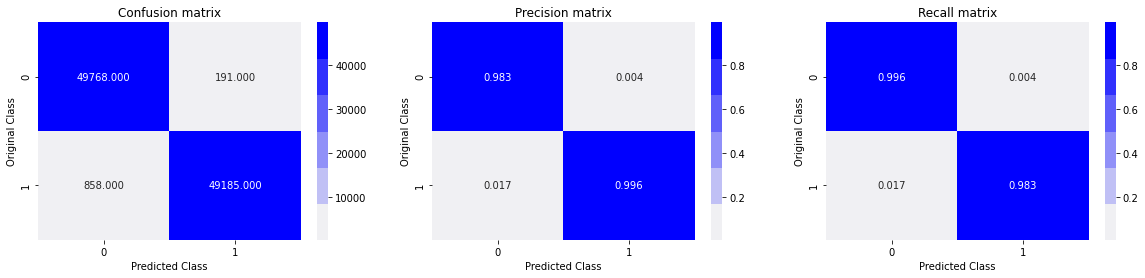

Test confusion_matrix


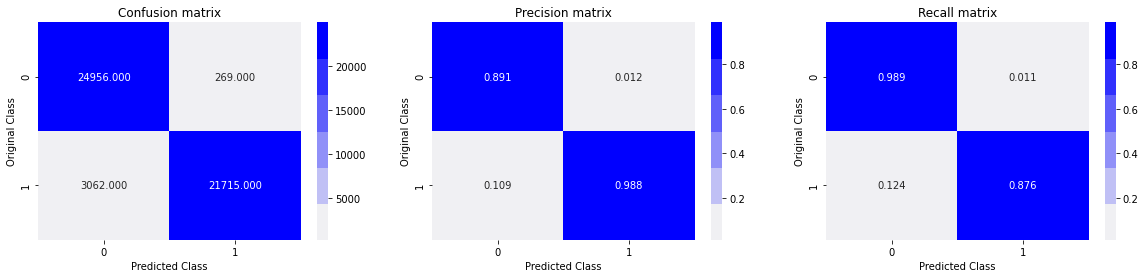

In [35]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

ROC/AUC Curve

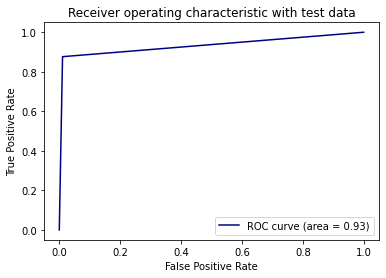

In [36]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

Feature Importance

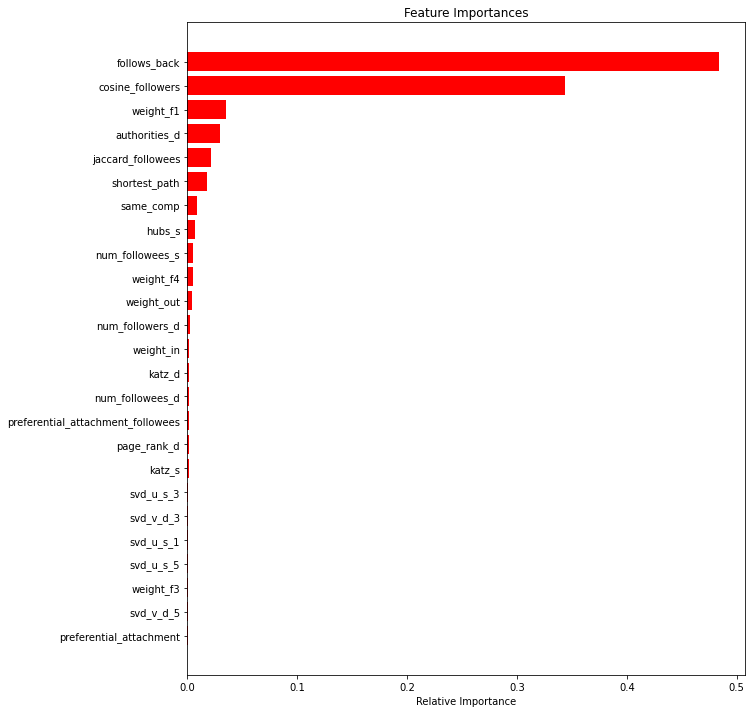

In [37]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2> Observations and Steps Followed <h2>

- Added preferential Attachment as a feature using the exisitng feature

- Added svd dot as a new features using already added svd features
- Trained all new features on Random Forest and got a f1 score of 0.922 for the Test data.
-Trained all new features on XgBoost and got a f1 score of 0.928 for the Test data
